<a href="https://colab.research.google.com/github/sampathv95/transfer-learning-med-images/blob/master/Brain_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# creating a data generator to read from directory
data_generator = ImageDataGenerator(rescale=1./255)

#### Image Data Directory Structure ####


brain-mri


*   no
*   yes



In [4]:
path_to_data = 'brain-mri'
# creating iterator for the generator
data_iterator = data_generator.flow_from_directory(path_to_data, target_size=(299, 299), class_mode='binary', batch_size=32, shuffle=False)

Found 253 images belonging to 2 classes.


In [0]:
# reading all the images and their labels
batch_index = 1
images_arr, labels_arr = data_iterator.next()
while batch_index <= data_iterator.batch_index:
  images, labels = data_iterator.next()
  images_arr = np.concatenate((images_arr, images), axis=0)
  labels_arr = np.concatenate((labels_arr, labels), axis=0)
  batch_index += 1

In [6]:
images_arr.shape, labels_arr.shape

((253, 299, 299, 3), (253,))

In [7]:
# creating pre-trained model and removing the last layer
inception_model = inception_v3.InceptionV3(weights='imagenet')
inception_model = Model(inputs=inception_model.inputs, outputs=inception_model.layers[-2].output)
len(inception_model.layers)

96116736/96112376 [==============================] - 2s 0us/step


312

In [0]:
# extracting features from images
image_features = inception_model.predict(images_arr)

In [9]:
image_features.shape

(253, 2048)

In [0]:
# saving features as '.npy' format file
np.save('image_features.npy', image_features)

####### load using np.load(image_features.npy) #########

In [0]:
# initializing the pca instance
pca = PCA(n_components=2)
image_features_reduced = pca.fit_transform(image_features)

In [15]:
pca.explained_variance_ratio_.sum()

0.18710539

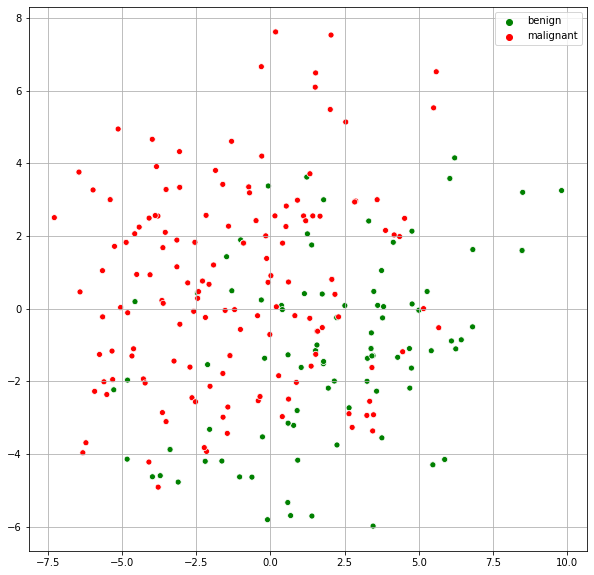

In [12]:
# plotting PCA components
plt.figure(figsize=(10, 10))
sns.scatterplot(x = image_features_reduced[:, 0], y=image_features_reduced[:, 1], hue=['benign' if i==0 else 'malignant'
                for i in labels_arr], palette=['green', 'red'])
plt.legend()
plt.grid()
plt.show()

### Difference in distribuions ###
We can see that the distribuion in each PCA component changes from one condition to other. It shows that there is a significant shift in distribution of features (2048 dimensional) extracted from pre-trained model.

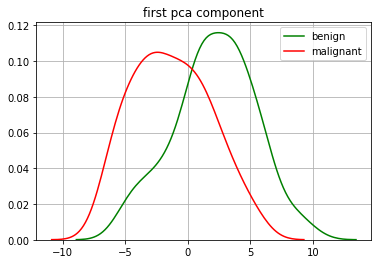

In [13]:
sns.distplot(image_features_reduced[labels_arr==0][:, 0], hist=False, label='benign', color='green')
sns.distplot(image_features_reduced[labels_arr==1][:, 0], hist=False, label='malignant', color='red')
plt.title('first pca component')
plt.grid()  
plt.show()

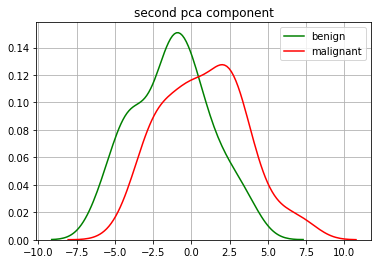

In [14]:
sns.distplot(image_features_reduced[labels_arr==0][:, 1], hist=False, label='benign', color='green')
sns.distplot(image_features_reduced[labels_arr==1][:, 1], hist=False, label='malignant', color='red')
plt.title('second pca component')
plt.grid()
plt.show()

Difference between distributions in both the components is not significantly different because much of the variance in the orginial feature space is lost due to dimensionality reduction.